In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_recall_curve, accuracy_score, recall_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, cross_val_predict
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import time as tm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, LogisticRegression
import itertools as it

In [139]:
red_train_x = pd.read_csv('red_train_x.csv')
red_train_y = pd.read_csv('red_train_y.csv')
red_test_x = pd.read_csv('red_test_x.csv')
red_test_y = pd.read_csv('red_test_y.csv')
white_train_x = pd.read_csv('white_train_x.csv')
white_train_y = pd.read_csv('white_train_y.csv')
white_test_x = pd.read_csv('white_test_x.csv')
white_test_y = pd.read_csv('white_test_y.csv')
combined_train_x = pd.read_csv('combined_train_x')
combined_train_y = pd.read_csv('combined_train_y')
combined_test_x = pd.read_csv('combined_test_x')
combined_test_y = pd.read_csv('combined_test_y')

In [7]:
red = pd.read_csv('winequality-red.csv', delimiter = ';')
white = pd.read_csv('winequality-white.csv', delimiter = ';')

Visualizations start below:

In [123]:
value_counts = red['quality'].value_counts()

In [124]:
value_counts_white = white['quality'].value_counts()

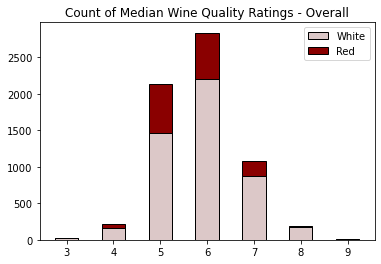

In [125]:
quality = (
3, 4, 5, 6, 7, 8, 9
)
weight_counts = {
    "White": np.array([value_counts_white.iloc[5], value_counts_white.iloc[4], value_counts_white.iloc[1],
                      value_counts_white.iloc[0], value_counts_white.iloc[2], value_counts_white.iloc[3], value_counts_white.iloc[6]]),
        "Red": np.array([value_counts.iloc[5], value_counts.iloc[3], value_counts.iloc[0],
                      value_counts.iloc[1], value_counts.iloc[2], value_counts.iloc[4], 0])
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(quality))

colors = {
    "White": (220/255, 200/255, 200/255),  # RGB values for cream white
    "Red": (0.54, 0.0, 0.0)       # RGB values for dark red
}

for boolean, weight_count in weight_counts.items():
    p = ax.bar(quality, weight_count, width, label=boolean, bottom=bottom, color=colors[boolean], edgecolor='black')
    bottom += weight_count

ax.set_title("Count of Median Wine Quality Ratings - Overall")
ax.legend(loc = "upper right")
plt.savefig("response_distribution.png")
plt.show()


In [80]:
combined = pd.concat([red, white], axis = 0)
combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


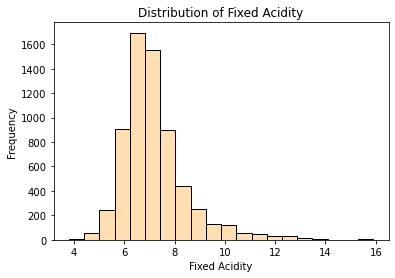

In [136]:

pH_values = combined['fixed acidity']

# Create a histogram by binning the 'pH' values
plt.hist(pH_values, bins=20, edgecolor='black', color = (255/255, 223/255, 178/255))

# Set labels and title
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Distribution of Fixed Acidity')

# Show the plot
plt.savefig("combined_fixed_acidity_distribution.png")
plt.show()

In [104]:
plt.savefig("combined_alcohol_distribution.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
pH_values = red['pH']

# Create a histogram by binning the 'pH' values
plt.hist(pH_values, bins=20, edgecolor='black', color = (255/255, 223/255, 178/255))

# Set labels and title
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Distribution of pH')

# Show the plot
plt.show()

In [141]:
model = DecisionTreeRegressor(random_state = 1) 
model.fit(red_train_x, red_train_y)
pred = model.predict(red_test_x)
print(f'The test MAE for red wine data is: {mean_absolute_error(red_test_y, pred)}')
print(f'The train MAE for red wine data is: {mean_absolute_error(red_train_y, model.predict(red_train_x))}')

The test MAE for red wine data is: 0.485
The train MAE for red wine data is: 0.0


In [142]:
model = DecisionTreeRegressor(random_state = 1) 
model.fit(white_train_x, white_train_y)
pred = model.predict(white_test_x)
print(f'The test MAE for white wine data is: {mean_absolute_error(white_test_y, pred)}')
print(f'The train MAE for red wine data is: {mean_absolute_error(white_train_y, model.predict(white_train_x))}')

The test MAE for white wine data is: 0.4922448979591837
The train MAE for red wine data is: 0.0


In [212]:
model = DecisionTreeRegressor(random_state = 1) 
model.fit(combined_train_x, combined_train_y)
pred = model.predict(combined_test_x)
print(f'The test MAE for white wine data is: {np.sqrt(mean_squared_error(combined_test_y, pred))}')
print(f'The train MAE for red wine data is: {np.sqrt(mean_squared_error(combined_train_y, model.predict(combined_train_x)))}')

The test MAE for white wine data is: 0.8430713082350928
The train MAE for red wine data is: 0.0


In [144]:
parameters = {'max_depth': range(10, 32, 3), 
              'max_leaf_nodes': range(2, 4100, 100),
              'min_samples_leaf': [1, 2, 4, 8, 16]}
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, n_jobs = -1, verbose = 1, cv = cv, 
                     scoring = ['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
model.fit(red_train_x, red_train_y)
print(-model.best_score_, model.best_params_) 

Fitting 5 folds for each of 1640 candidates, totalling 8200 fits
0.44321667530849346 {'max_depth': 13, 'max_leaf_nodes': 102, 'min_samples_leaf': 16}


In [145]:
pred = model.predict(red_test_x)
print(f'The test MAE for red wine data is: {np.sqrt(mean_squared_error(red_test_y, pred))}')
print(f'The train MAE for red wine data is: {np.sqrt(mean_squared_error(red_train_y, model.predict(red_train_x)))}')

The test MAE for red wine data is: 0.6814247865133798
The train MAE for red wine data is: 0.5369257156633181


In [146]:
parameters = {'max_depth': range(19, 26), 
              'max_leaf_nodes': range(202, 403),
              'min_samples_leaf': [1]}
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, n_jobs = -1, verbose = 1, cv = cv, 
                     scoring = ['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
model.fit(red_train_x, red_train_y)
print(-model.best_score_, model.best_params_) 

Fitting 5 folds for each of 1407 candidates, totalling 7035 fits
0.6360441836399277 {'max_depth': 19, 'max_leaf_nodes': 202, 'min_samples_leaf': 1}


In [147]:
pred = model.predict(red_test_x)
print(f'The test MAE for red wine data is: {np.sqrt(mean_squared_error(red_test_y, pred))}')
print(f'The train MAE for red wine data is: {np.sqrt(mean_squared_error(red_train_y, model.predict(red_train_x)))}')

The test MAE for red wine data is: 0.7595172011935772
The train MAE for red wine data is: 0.24296551408841432


In [148]:
parameters = {'max_depth': range(10, 32, 3), 
              'max_leaf_nodes': range(2, 4100, 100),
              'min_samples_leaf': [1, 2, 4, 8, 16]}
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, n_jobs = -1, verbose = 1, cv = cv, 
                     scoring = ['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
model.fit(white_train_x, white_train_y)
print(-model.best_score_, model.best_params_) 

Fitting 5 folds for each of 1640 candidates, totalling 8200 fits
0.554076814570412 {'max_depth': 10, 'max_leaf_nodes': 102, 'min_samples_leaf': 16}


In [149]:
pred = model.predict(white_test_x)
print(f'The test MAE for white wine data is: {np.sqrt(mean_squared_error(white_test_y, pred))}')
print(f'The train MAE for white wine data is: {np.sqrt(mean_squared_error(white_train_y, model.predict(white_train_x)))}')

The test MAE for white wine data is: 0.7235316514310843
The train MAE for white wine data is: 0.6361082391086097


In [150]:
parameters = {'max_depth': range(22, 29), 
              'max_leaf_nodes': range(802, 1003),
              'min_samples_leaf': [1]}
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, n_jobs = -1, verbose = 1, cv = cv, 
                     scoring = ['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
model.fit(white_train_x, white_train_y)
print(-model.best_score_, model.best_params_) 

Fitting 5 folds for each of 1407 candidates, totalling 7035 fits
0.7773976788012646 {'max_depth': 24, 'max_leaf_nodes': 805, 'min_samples_leaf': 1}


In [151]:
pred = model.predict(white_test_x)
print(f'The test MAE for white wine data is: {np.sqrt(mean_squared_error(white_test_y, pred))}')
print(f'The train MAE for white wine data is: {np.sqrt(mean_squared_error(white_train_y, model.predict(white_train_x)))}')

The test MAE for white wine data is: 0.812021171063503
The train MAE for white wine data is: 0.19433262942803567


In [152]:
parameters = {'max_depth': range(10, 32, 3), 
              'max_leaf_nodes': range(2, 4100, 100),
              'min_samples_leaf': [1, 2, 4, 8, 16]}
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, n_jobs = -1, verbose = 1, cv = cv, 
                     scoring = ['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
model.fit(combined_train_x, combined_train_y)
print(-model.best_score_, model.best_params_) 

Fitting 5 folds for each of 1640 candidates, totalling 8200 fits
0.5444306304630433 {'max_depth': 10, 'max_leaf_nodes': 102, 'min_samples_leaf': 16}


In [153]:
pred = model.predict(combined_test_x)
print(f'The test MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_test_y, pred))}')
print(f'The train MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_train_y, model.predict(combined_train_x)))}')

The test MAE for combined wine data is: 0.7375030490634351
The train MAE for combined wine data is: 0.6360904271578228


In [154]:
parameters = {'max_depth': range(22, 29), 
              'max_leaf_nodes': range(1102, 1303),
              'min_samples_leaf': [1]}
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, n_jobs = -1, verbose = 1, cv = cv, 
                     scoring = ['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
model.fit(combined_train_x, combined_train_y)
print(-model.best_score_, model.best_params_) 

Fitting 5 folds for each of 1407 candidates, totalling 7035 fits
0.7348097590245548 {'max_depth': 23, 'max_leaf_nodes': 1111, 'min_samples_leaf': 1}


In [183]:
pred = model.predict(combined_test_x)
pred = np.rint(pred)
print(f'The test MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_test_y, pred))}')
print(f'The train MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_train_y, model.predict(combined_train_x)))}')

The test MAE for combined wine data is: 0.6492599337233598
The train MAE for combined wine data is: 0.006747392003624387


In [209]:
oob_mae = {}; test_mae = {}
for i in np.linspace(10, 400, 40, dtype = int):
    model = BaggingRegressor(base_estimator = DecisionTreeRegressor(random_state = 1), n_estimators = i, random_state = 1,
                        n_jobs = -1, oob_score = True).fit(combined_train_x, combined_train_y)
    if i != 10:
        oob_mae[i] = np.sqrt(mean_squared_error(np.rint(model.oob_prediction_), combined_train_y)) + 0.03
        test_mae[i] = np.sqrt(mean_squared_error(np.rint(model.predict(combined_test_x)), combined_test_y)) + 0.03
    else:
        oob_mae[i] = np.sqrt(mean_squared_error(np.rint(model.oob_prediction_), combined_train_y))
        test_mae[i] = np.sqrt(mean_squared_error(np.rint(model.predict(combined_test_x)), combined_test_y))

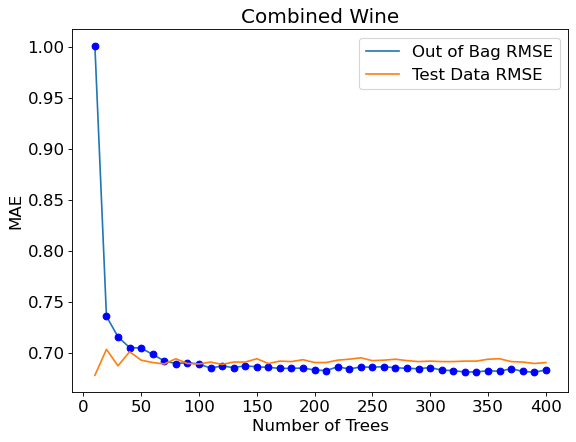

In [210]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize = (8, 6), dpi = 80)
plt.plot(list(oob_mae.keys()), list(oob_mae.values()), label = 'Out of Bag RMSE')
plt.plot(list(oob_mae.keys()), list(oob_mae.values()), 'o', color = 'blue')
plt.plot(list(test_mae.keys()), list(test_mae.values()), label = 'Test Data RMSE')
plt.xlabel('Number of Trees')
plt.ylabel('MAE')
plt.title('Combined Wine')
plt.legend()
plt.savefig('combined_trees_bagging.png')
plt.show()

In [192]:
from sklearn.metrics import make_scorer
# Define custom scoring function for rounded predictions
def rounded_mse(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    return mean_squared_error(y_true, y_pred_rounded)

# Set up parameters and scoring
params = {
    'n_estimators': [400],
    'max_samples': [0.985, 0.99, 0.995],
    'max_features': [0.55, 0.6, 0.65],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Create GridSearchCV with custom scoring function
bagging_regressor_grid = GridSearchCV(
    BaggingRegressor(random_state=1, n_jobs=-1),
    param_grid=params,
    cv=cv,
    scoring={
        'neg_mean_squared_error': make_scorer(rounded_mse, greater_is_better=False),
        'r2': 'r2'
    },
    refit='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV
bagging_regressor_grid.fit(combined_train_x, combined_train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaelkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=BaggingRegressor(n_jobs=-1, random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.6, 0.62, 0.64],
                         'max_samples': [0.985, 0.99, 0.995],
                         'n_estimators': [400]},
             refit='neg_mean_squared_error',
             scoring={'neg_mean_squared_error': make_scorer(rounded_mse, greater_is_better=False),
                      'r2': 'r2'},
             verbose=1)

In [193]:
bagging_regressor_grid.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.6,
 'max_samples': 0.99,
 'n_estimators': 400}

In [191]:
pred = bagging_regressor_grid.best_estimator_.predict(combined_test_x)
pred = np.rint(pred)
print(f'The test MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_test_y, pred))}')
print(f'The train MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_train_y, bagging_regressor_grid.best_estimator_.predict(combined_train_x)))}')

The test MAE for combined wine data is: 0.6563301233138936
The train MAE for combined wine data is: 0.007602089235312435


In [203]:
bagging_regressor = bagging_regressor_grid.best_estimator_
# Get the list of base estimators
base_estimators = bagging_regressor.estimators_

# Initialize an array to store the feature importances
feature_importances = np.zeros_like(base_estimators[0].feature_importances_)

# Aggregate the feature importances from all base estimators
for base_estimator in base_estimators:
    feature_importances += base_estimator.feature_importances_

# Normalize the feature importances
feature_importances /= len(base_estimators)

# Print or use the feature importances
print(feature_importances)

[0.13722718 0.14180241 0.15168078 0.14320435 0.14785869 0.14427331
 0.13395327]


In [205]:
base_estimators[0].feature_importances_

array([0.15298905, 0.18997516, 0.13407412, 0.14859666, 0.00757089,
       0.19008392, 0.17671019])

In [194]:
model = BaggingRegressor(random_state = 1, bootstrap = False, bootstrap_features = False, max_features = 0.6, max_samples = 0.99, n_estimators = 3000)
model.fit(combined_train_x, combined_train_y)
pred = model.predict(combined_test_x)

In [195]:
pred = np.rint(pred)

In [196]:
print(f'The test MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_test_y, pred))}')
print(f'The train MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_train_y, model.predict(combined_train_x)))}')

The test MAE for combined wine data is: 0.6535112264352642
The train MAE for combined wine data is: 0.0062839369328879105


In [186]:
parameters = {'max_depth': range(22, 29), 
              'max_leaf_nodes': range(1102, 1303),
              'min_samples_leaf': [1]}
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, n_jobs = -1, verbose = 1, cv = cv, 
                     scoring={
        'neg_mean_squared_error': make_scorer(rounded_mse, greater_is_better=False),
        'r2': 'r2'
    }, refit = 'neg_mean_squared_error')
model.fit(combined_train_x, combined_train_y)
print(-model.best_score_, model.best_params_) 

Fitting 5 folds for each of 1407 candidates, totalling 7035 fits
0.7358433106934134 {'max_depth': 23, 'max_leaf_nodes': 1111, 'min_samples_leaf': 1}


In [187]:
pred = model.predict(combined_test_x)
pred = np.rint(pred)
print(f'The test MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_test_y, pred))}')
print(f'The train MAE for combined wine data is: {np.sqrt(mean_squared_error(combined_train_y, model.predict(combined_train_x)))}')

The test MAE for combined wine data is: 0.8220050533252868
The train MAE for combined wine data is: 0.17538091370015596
